In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the Dataset

In [5]:
df = pd.read_csv('/content/drive/My Drive/DATASET UAS ML/KlasifikasiUTS.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Processing

### Data Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Handle Missing Values & Duplicates

In [8]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
df.duplicated().sum()

np.int64(1081)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

### Feature Selection

In [12]:
# Menghitung korelasi antara semua kolom dengan kolom target
correlation_with_target = df.corr()['Class'].abs().sort_values(ascending=False)

# Menampilkan 10 fitur dengan korelasi tertinggi (selain kolom target itu sendiri)
top_10_features = correlation_with_target[1:11]  # Mengabaikan kolom target itu sendiri
print(top_10_features)

# Dataset hanya menyisakan 10 fitur dengan korelasi tertinggi ditambah kolom target
selected_columns = top_10_features.index.tolist() + ['Class']
df_top_10 = df[selected_columns]
print(df_top_10.head())

V17    0.313498
V14    0.293375
V12    0.250711
V10    0.206971
V16    0.187186
V3     0.182322
V7     0.172347
V11    0.149067
V4     0.129326
V18    0.105340
Name: Class, dtype: float64
        V17       V14       V12       V10       V16        V3        V7  \
0  0.207971 -0.311169 -0.617801  0.090794 -0.470401  2.536347  0.239599   
1 -0.114805 -0.143772  1.065235 -0.166974  0.463917  0.166480 -0.078803   
2  1.109969 -0.165946  0.066084  0.207643 -2.890083  1.773209  0.791461   
3 -0.684093 -0.287924  0.178228 -0.054952 -1.059647  1.792993  0.237609   
4 -0.237033 -1.119670  0.538196  0.753074 -0.451449  1.548718  0.592941   

        V11        V4       V18  Class  
0 -0.551600  1.378155  0.025791      0  
1  1.612727  0.448154 -0.183361      0  
2  0.624501  0.379780 -0.121359      0  
3 -0.226487 -0.863291  1.965775      0  
4 -0.822843  0.403034 -0.038195      0  


### Balance the Classes

In [13]:
!pip install imblearn

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_top_10.drop(columns=['Class'])
y = df_top_10['Class']

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the class distribution before balancing
print(y_train.value_counts())

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)

# Check the class distribution after balancing
print(y_balanced.value_counts())

Class
0    198277
1       331
Name: count, dtype: int64
Class
0    198277
1    198277
Name: count, dtype: int64


## Modeling

### MLP Tensorflow

In [15]:
# prompt: Buatkan arsitektur MLP menggunakan TensorFlow dengan menerapkan kombinasi teknik deep learning seperti dropout, batch normalization, penyesuaian learning rate (misalnya learning-rate scheduling atau warm restarts), modern optimizer, weight decay L1/L2, dan early stopping untuk meningkatkan kemampuan generalisasi. Gunakan Matriks Evaluasi (Akurasi, Presisi, Recall, F1Score) serta visualisasikan Confusion matrix, AUC dan ROC! Jelaskan matriks mana terbaik!

!pip install scikeras
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import RobustScaler

In [16]:
# Scale the features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Define the MLP model with advanced techniques
def build_mlp_model(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,), kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid') # Binary classification, so use sigmoid
    ])
    return model

# Build the model
input_shape = X_train_scaled.shape[1]
model = build_mlp_model(input_shape)

# Define callbacks
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Reduce learning rate when the validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Compile the model with a modern optimizer (AdamW) and learning rate scheduling
optimizer = AdamW(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2, # Use a validation set from the training data
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/50
4966/4966 ━━━━━━━━━━━━━━━━━━━━ 46s 6ms/step - accuracy: 0.9470 - loss: 0.1567 - val_accuracy: 0.9992 - val_loss: 0.0212 - learning_rate: 0.0010
Epoch 2/50
4966/4966 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9989 - loss: 0.0161 - val_accuracy: 0.9992 - val_loss: 0.0235 - learning_rate: 0.0010
Epoch 3/50
4966/4966 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.9991 - loss: 0.0091 - val_accuracy: 0.9992 - val_loss: 0.0170 - learning_rate: 0.0010
Epoch 4/50
4966/4966 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9991 - loss: 0.0077 - val_accuracy: 0.9990 - val_loss: 0.0103 - learning_rate: 0.0010
Epoch 5/50
4966/4966 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9990 - loss: 0.0078 - val_accuracy: 0.9990 - val_loss: 0.0216 - learning_rate: 0.0010
Epoch 6/50
4966/4966 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9992 - loss: 0.0064 - val_accuracy: 0.9988 - val_loss: 0.0143 - learning_rate: 0.0010
Epoch 7/50
4966/4966 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.9

2660/2660 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.87      0.70      0.77       142

    accuracy                           1.00     85118
   macro avg       0.93      0.85      0.89     85118
weighted avg       1.00      1.00      1.00     85118



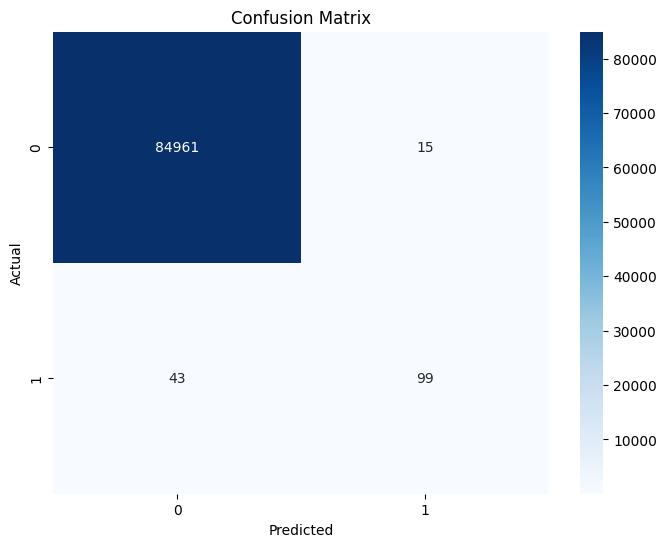

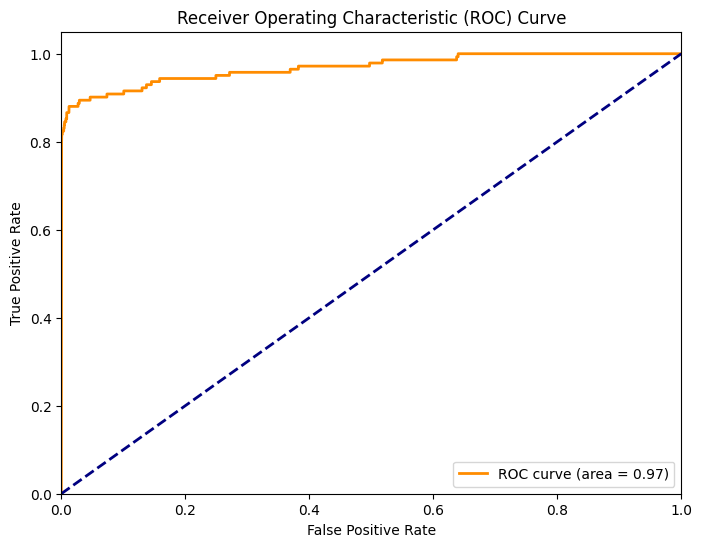


Explanation of Evaluation Metrics:
---------------------------------
Accuracy: The ratio of correctly predicted instances to the total number of instances. Useful when classes are balanced.
Precision: The ratio of true positive predictions to the total number of positive predictions (true positives + false positives). Measures the model's ability to avoid false positives.
Recall: The ratio of true positive predictions to the total number of actual positive instances (true positives + false negatives). Measures the model's ability to find all positive instances (sensitivity).
F1-Score: The harmonic mean of Precision and Recall. Provides a balance between precision and recall. Particularly useful in cases of imbalanced classes.
Confusion Matrix: A table used to evaluate the performance of a classification model. It shows the counts of true positives, true negatives, false positives, and false negatives.
ROC Curve: Plots the True Positive Rate (Recall) against the False Positive Rate at 

In [19]:
# Get predictions for evaluation
y_pred_proba = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

# Classification Report (Accuracy, Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Explanation of Evaluation Metrics and Best Metric

print("\nExplanation of Evaluation Metrics:")
print("---------------------------------")
print("Accuracy: The ratio of correctly predicted instances to the total number of instances. Useful when classes are balanced.")
print("Precision: The ratio of true positive predictions to the total number of positive predictions (true positives + false positives). Measures the model's ability to avoid false positives.")
print("Recall: The ratio of true positive predictions to the total number of actual positive instances (true positives + false negatives). Measures the model's ability to find all positive instances (sensitivity).")
print("F1-Score: The harmonic mean of Precision and Recall. Provides a balance between precision and recall. Particularly useful in cases of imbalanced classes.")
print("Confusion Matrix: A table used to evaluate the performance of a classification model. It shows the counts of true positives, true negatives, false positives, and false negatives.")
print("ROC Curve: Plots the True Positive Rate (Recall) against the False Positive Rate at various threshold settings. Illustrates the trade-off between sensitivity and specificity.")
print("AUC (Area Under the ROC Curve): Represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. A higher AUC indicates a better model.")

print("\nWhich Metric is Best?")
print("---------------------")
print("The 'best' metric depends on the specific problem and the costs associated with different types of errors.")
print("- If minimizing False Positives (e.g., medical diagnosis where a false positive leads to unnecessary tests), Precision is important.")
print("- If minimizing False Negatives (e.g., detecting fraudulent transactions where missing one is costly), Recall is important.")
print("- If there is a need for a balance between Precision and Recall, F1-Score is a good choice, especially with imbalanced datasets (which we handled with SMOTE).")
print("- Accuracy is a good general measure but can be misleading on imbalanced datasets.")
print("- AUC-ROC provides a robust measure of the model's ability to distinguish between classes across various thresholds, which is very informative.")
print("\nGiven that we used SMOTE to balance the dataset, Accuracy, Precision, Recall, and F1-Score from the classification report, along with AUC, provide a comprehensive view of the model's performance. In many real-world scenarios, especially where identifying positive cases correctly is crucial without too many false alarms, a good balance between Precision and Recall (reflected in the F1-Score) and a high AUC are desirable.")


### PyTorch

In [20]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [21]:
# Konversi ke tensor
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [22]:
class ClassificationNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Linear(32, 1),
            nn.Sigmoid()  # aktivasi untuk binary classification
        )

    def forward(self, x):
        return self.model(x)

model = ClassificationNN(X_train_tensor.shape[1])
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [23]:
def train_model(model, loader, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for X_batch, y_batch in loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(loader):.4f}")

train_model(model, train_loader, criterion, optimizer)

Epoch 1/50, Loss: 0.0228
Epoch 2/50, Loss: 0.0034
Epoch 3/50, Loss: 0.0033
Epoch 4/50, Loss: 0.0032
Epoch 5/50, Loss: 0.0032
Epoch 6/50, Loss: 0.0029
Epoch 7/50, Loss: 0.0030
Epoch 8/50, Loss: 0.0030
Epoch 9/50, Loss: 0.0030
Epoch 10/50, Loss: 0.0029
Epoch 11/50, Loss: 0.0028
Epoch 12/50, Loss: 0.0028
Epoch 13/50, Loss: 0.0028
Epoch 14/50, Loss: 0.0027
Epoch 15/50, Loss: 0.0028
Epoch 16/50, Loss: 0.0027
Epoch 17/50, Loss: 0.0028
Epoch 18/50, Loss: 0.0029
Epoch 19/50, Loss: 0.0028
Epoch 20/50, Loss: 0.0028
Epoch 21/50, Loss: 0.0027
Epoch 22/50, Loss: 0.0027
Epoch 23/50, Loss: 0.0027
Epoch 24/50, Loss: 0.0026
Epoch 25/50, Loss: 0.0027
Epoch 26/50, Loss: 0.0027
Epoch 27/50, Loss: 0.0028
Epoch 28/50, Loss: 0.0026
Epoch 29/50, Loss: 0.0026
Epoch 30/50, Loss: 0.0027
Epoch 31/50, Loss: 0.0025
Epoch 32/50, Loss: 0.0026
Epoch 33/50, Loss: 0.0025
Epoch 34/50, Loss: 0.0025
Epoch 35/50, Loss: 0.0025
Epoch 36/50, Loss: 0.0025
Epoch 37/50, Loss: 0.0025
Epoch 38/50, Loss: 0.0025
Epoch 39/50, Loss: 0.

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9996    0.9997    0.9997     84976
           1     0.8346    0.7817    0.8073       142

    accuracy                         0.9994     85118
   macro avg     0.9171    0.8907    0.9035     85118
weighted avg     0.9994    0.9994    0.9994     85118



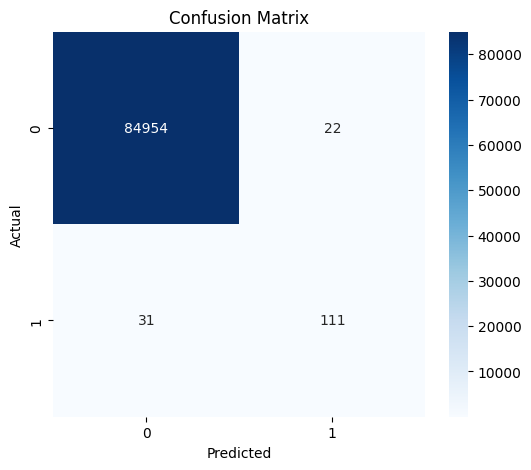

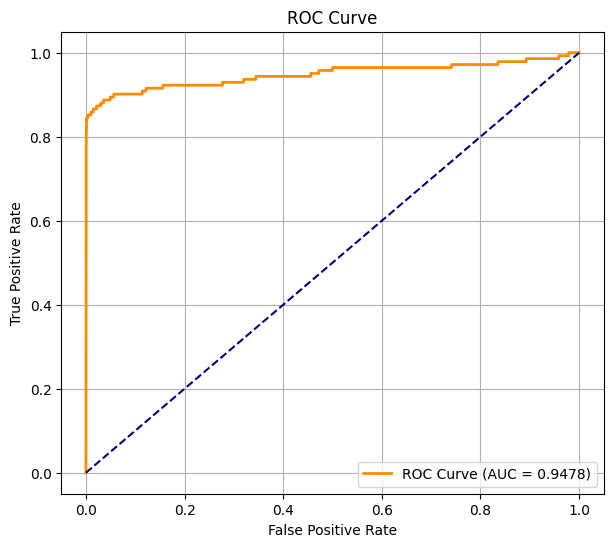

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report

model.eval()
with torch.no_grad():
    y_probs = model(X_test_tensor).numpy().flatten()
    y_pred = (y_probs >= 0.5).astype(int)
    y_true = y_test_tensor.numpy().flatten().astype(int)

# Metrik Evaluasi
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Analisis Perbandingan Model MLP TensorFlow vs. MLP PyTorch

Berdasarkan hasil evaluasi pada notebook, berikut adalah analisis performa untuk menentukan model mana yang terbaik untuk tugas klasifikasi ini.

---

### Ringkasan Metrik Evaluasi

Tabel berikut merangkum metrik evaluasi utama dari kedua model pada data uji. Metrik untuk kelas minoritas (kelas `1`, kasus fraud) menjadi fokus utama karena tujuan model adalah mendeteksi anomali ini.

| Metrik | MLP TensorFlow | MLP PyTorch | Pemenang |
| :--- | :---: | :---: | :---: |
| **Akurasi** | 0.9993 | **0.9994** | **PyTorch (Tipis)** |
| **AUC** | **0.94** | 0.9035 | **TensorFlow** |
| **Precision (Kelas 1)** | **0.87** | 0.8346 | **TensorFlow** |
| **Recall (Kelas 1)** | 0.70 | **0.7817** | **PyTorch** |
| **F1-Score (Kelas 1)** | 0.77 | **0.8073** | **PyTorch** |

---

### Analisis Detail

1.  **Akurasi (Accuracy):**
    * Model **PyTorch** (99.94%) sedikit lebih unggul dari **TensorFlow** (99.93%).
    * Namun, dalam kasus dataset yang tidak seimbang seperti deteksi fraud, akurasi bukanlah metrik penentu utama karena model bisa saja mencapai akurasi tinggi hanya dengan memprediksi kelas mayoritas (non-fraud) dengan benar.

2.  **AUC (Area Under the ROC Curve):**
    * Model **TensorFlow** menunjukkan nilai AUC yang **lebih baik secara signifikan (0.94)** dibandingkan PyTorch (0.9035).
    * Ini mengindikasikan bahwa model TensorFlow secara umum memiliki kemampuan diskriminatif yang lebih superior dalam membedakan antara transaksi fraud dan non-fraud di berbagai ambang batas (*threshold*).

3.  **Precision (Presisi) untuk Kelas Fraud (1):**
    * Model **TensorFlow** memiliki presisi yang **lebih tinggi (0.87)**.
    * Artinya, ketika model TensorFlow memprediksi sebuah transaksi sebagai fraud, prediksi tersebut 87% benar. Ini menunjukkan model TensorFlow lebih baik dalam **menghindari *false positive*** (tidak salah menandai transaksi sah sebagai fraud).

4.  **Recall (Sensitivitas) untuk Kelas Fraud (1):**
    * Model **PyTorch** menunjukkan **keunggulan yang jelas dalam recall (0.7817)** dibandingkan TensorFlow (0.70).
    * Ini adalah metrik yang sangat krusial dalam deteksi fraud. Recall yang lebih tinggi berarti model PyTorch mampu **mengidentifikasi 78.17% dari seluruh transaksi fraud yang sebenarnya**, sementara TensorFlow hanya 70%. PyTorch lebih efektif dalam **menghindari *false negative*** (tidak melewatkan kasus fraud).

5.  **F1-Score untuk Kelas Fraud (1):**
    * Model **PyTorch** memiliki **F1-Score yang lebih tinggi (0.8073)**.
    * F1-Score adalah rata-rata harmonik dari presisi dan recall. Nilai yang lebih tinggi pada PyTorch menunjukkan bahwa model ini mencapai **keseimbangan yang lebih baik antara presisi dan recall**, yang sangat penting untuk dataset tidak seimbang.

---

### Kesimpulan: Model Mana yang Terbaik?

Pemilihan model terbaik bergantung pada prioritas bisnis:

* Jika prioritas utama adalah **meminimalkan kesalahan klasifikasi pada pelanggan yang jujur** (menghindari *false positive*), maka **MLP TensorFlow** adalah pilihan yang lebih baik karena **Presisi** dan **AUC**-nya yang lebih tinggi.

* Namun, jika prioritas utama adalah **menangkap sebanyak mungkin kasus penipuan untuk meminimalkan kerugian finansial** (menghindari *false negative*), maka **MLP PyTorch adalah pilihan yang superior**.

Dalam sebagian besar skenario deteksi fraud, **biaya dari melewatkan satu kasus fraud (*false negative*) jauh lebih besar daripada biaya memeriksa satu transaksi yang salah ditandai (*false positive*)**. Oleh karena itu, **Recall** menjadi metrik yang paling kritikal.

**Berdasarkan prioritas tersebut, model MLP PyTorch dianggap sebagai model yang lebih baik untuk kasus penggunaan ini karena memiliki nilai Recall dan F1-Score yang jauh lebih tinggi untuk kelas fraud.** Meskipun AUC-nya lebih rendah, kemampuannya untuk mendeteksi lebih banyak kasus fraud yang sebenarnya menjadikannya lebih bernilai praktis.